In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import random
from matplotlib.pyplot import figure
random.seed(0)
figure(figsize=(15, 6), dpi=80)
%config Completer.use_jedi=False

<Figure size 1200x480 with 0 Axes>

In [2]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
x=[random.randrange(0,20,1) for i in range(20)]
x=np.array(x)
y=(-2*x) + 1
print(f'x={x}\ny{y}')
print(f'x_shape={x.shape}\ny_shape{y.shape}')


x=[12 13  1  8 16 15 12  9 15 11 18  6 16  4  9  4  3 19  8 17]
y[-23 -25  -1 -15 -31 -29 -23 -17 -29 -21 -35 -11 -31  -7 -17  -7  -5 -37
 -15 -33]
x_shape=(20,)
y_shape(20,)


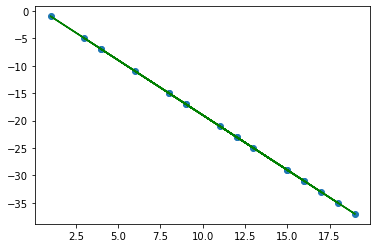

In [4]:
plt.plot(x,y,color="green")
plt.scatter(x,y)
plt.show()

In [ ]:
#np.column_stack((np.ones(len(x),dtype=int) , x))

In [ ]:
#y.reshape(-1,1).shape

In [ ]:
#(x.shape)[0]

In [ ]:
#np.zeros((np.zeros((x.shape[1],1),1)) # x is matrix inside it x0 , x1

In [ ]:
#y.reshape(-1,1).shape

# 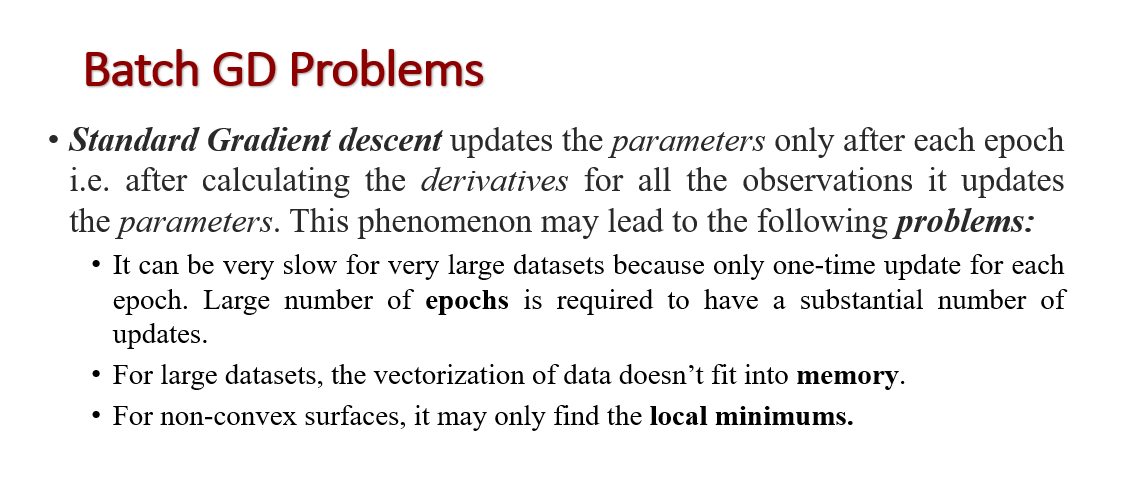

# 1) BATCH GRADIENT DESCENT

In [8]:
def Batch_GD(x,y,maxEpochs,learningRate ,convergence):
    loss=[]
    thetaList0=[]
    thetaList1=[]
    ypredictedEpochs=[]
    X=np.column_stack((np.ones(len(x),dtype=int),x)) #more columns x0 ,x1
    y=y.reshape(-1,1)     #(shape(20,1))
    m=(X.shape)[0]        #m=20
    thetas=np.zeros((X.shape[1],1))
    count=0
    epoch=0
    while epoch < maxEpochs:
        count +=1
        
        ypredicted = X @ thetas # (20,2) @ (2,1) ===> (20,1)
        costOld=(np.sum(np.square(ypredicted - y)))/ (2*m) #Mean Square Error (old). 
        
        Gradient = (np.transpose(X) @ (ypredicted - y) ) / m # (2,20) @ (20,1) ====>  (2,1)
        thetas =thetas - (learningRate * Gradient) #(2,1)
        thetaList0.append(thetas[0])
        thetaList1.append(thetas[1])
        
        
        ypredicted = X @ thetas # (20,2) @ (2,1) ===> (20,1)
        costNew=(np.sum(np.square(ypredicted - y)))/ (2*m) #Mean Square Error (New). 
        
        loss.append(costNew) #loss list
        ypredictedEpochs.append(ypredicted)
        
        if abs(costOld - costNew) < convergence:
            print(f'convergence occur after ({count}) iterations')
            return r2_score(y,ypredicted) ,thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        
        epoch+=1
    
    print(f'sorru=y Max_epochs ({maxEpochs}) have occured')
    return r2_score(y,ypredicted),thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        

In [9]:
R2Score,thetas,ypredicted,loss,thetaList0,thetaList1,ypredictedEpochs=Batch_GD(x,y,1000,0.0001,0.0001)

convergence occur after (388) iterations


In [10]:
R2Score * 100

99.77054278129594

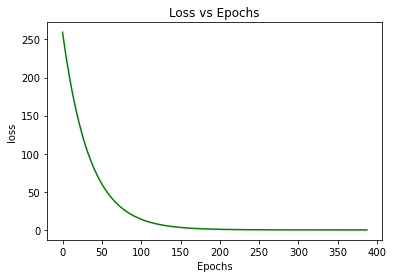

In [11]:
plt.plot(loss , color="green")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss vs Epochs")
plt.show()

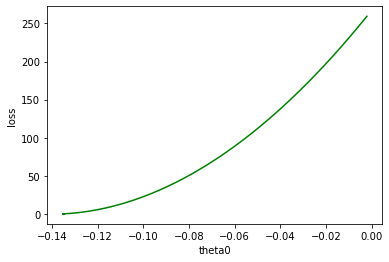

In [12]:
plt.plot(thetaList0,loss,color="green")
plt.xlabel("theta0")
plt.ylabel("loss")
plt.show()

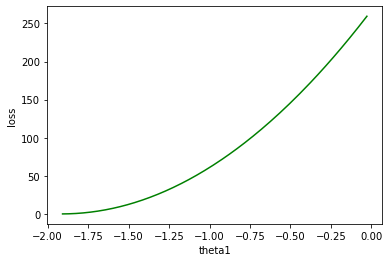

In [13]:
plt.plot(thetaList1,loss,color="green")
plt.xlabel("theta1")
plt.ylabel("loss")
plt.show()

In [ ]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)
    plt.show()

In [ ]:
plt.scatter(x,y)
plt.plot(x,ypredicted)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Best regression Line")
plt.show()

In [ ]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)

# 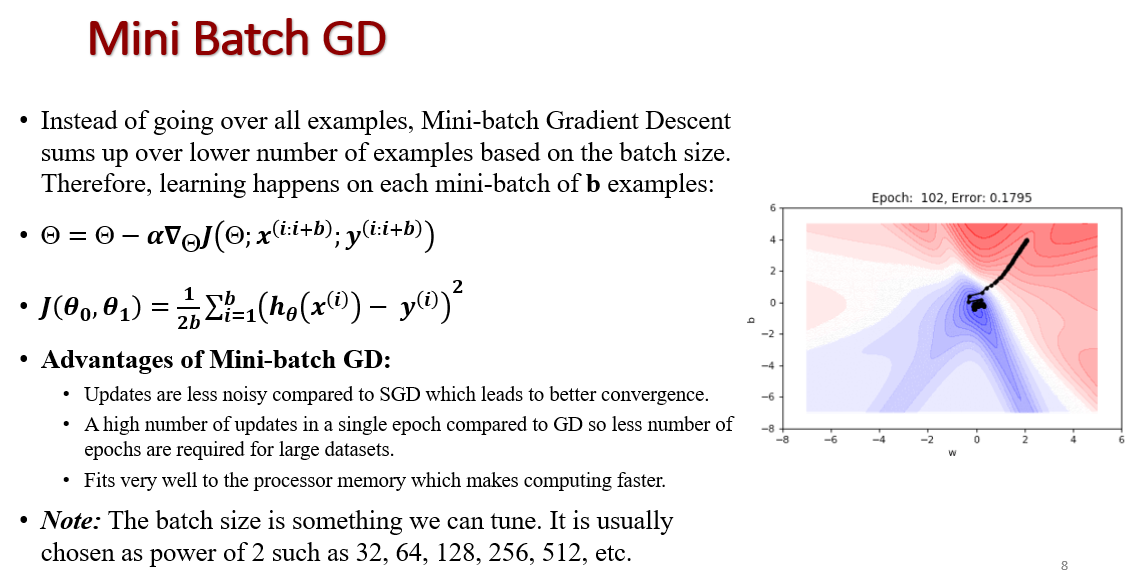

# 2) MINI BATCH GRADIENT DESCENT

In [ ]:
def Mini_Batch_GD(x,y,maxEpochs , batchSize , learningRate , convergence):
    loss=[]
    thetaList0=[]
    thetaList1=[]
    ypredictedEpochs=[]
    X=np.column_stack((np.ones(len(x),dtype=int),x))
    y=y.reshape(-1,1)     
    m=(X.shape)[0]        
    thetas=np.zeros((X.shape[1],1))
    count=0
    epoch=0
    
    lossBatch=[]
    ypredictedList=[]
    numberOfBatch=int(m/batchSize) 
    
    while epoch < maxEpochs:
        count +=1
        for i in range(0,m,numberOfBatch):
            ypredicted = X[i:i+numberOfBatch] @ thetas 
            ypredictedList.append(ypredicted)
            
            costOld=(np.sum(np.square(ypredicted - y[i:i+numberOfBatch])))/ (2*numberOfBatch) 

            Gradient = (np.transpose(X[i:i+numberOfBatch]) @ (ypredicted - y[i:i+numberOfBatch]) ) / numberOfBatch 
            thetas =thetas - (learningRate * Gradient)
            thetaList0.append(thetas[0])
            thetaList1.append(thetas[1])


            ypredicted = X[i:i+numberOfBatch] @ thetas 
            ypredictedTotal=X@thetas
            
            costNew=(np.sum(np.square(ypredicted - y[i:i+numberOfBatch])))/ (2*numberOfBatch)  
            lossBatch.append(costNew) #loss list
            
        
        ypredictedEpochs.append(ypredictedTotal)
        loss.append(costNew)
        
        if abs(costOld - costNew) < convergence:
            print(f'convergence occur after ({count}) iterations')
            yp=np.concatenate(ypredictedList , axis=0)
            yp=np.reshape(yp[-1*m:],(m,1))
            return r2_score(y,yp) ,thetas[-1] ,yp ,loss ,lossBatch,thetaList0 ,thetaList1 ,ypredictedEpochs
        
        epoch+=1
        yp=np.concatenate(ypredictedList , axis=0)
        yp=np.reshape(y[-1*m:],(m,1))
        
    print(f'sorry Max_epochs ({maxEpochs}) have occured')
    return r2_score(y,yp) ,thetas[-1] ,yp ,loss ,lossBatch,thetaList0 ,thetaList1 ,ypredictedEpochs
        

In [ ]:
R2score ,mthetas ,yp ,mloss ,lossBatch,thetaList0 ,thetaList1 ,ypredictedEpochs =Mini_Batch_GD(x,y,1000 , 5 , 0.00001 , 0.0001)

In [ ]:
R2score *100

In [ ]:
plt.plot(mloss,color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss vs epochs")
plt.show()

In [ ]:
plt.plot(thetaList0,lossBatch , color="green")
plt.xlabel("theta0")
plt.ylabel("lossBatch")
plt.title("theta0 vs lossBatch")
plt.show()

In [ ]:
plt.plot(thetaList1,lossBatch , color="green")
plt.xlabel("theta0")
plt.ylabel("lossBatch")
plt.title("theta0 vs lossBatch")
plt.show()

In [ ]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)
    plt.show()

In [ ]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)

In [ ]:
plt.scatter(x,y)
plt.plot(x,yp)
plt.xlabel("x")
plt.ylabel("y")
plt.title("best lineRegression")
plt.show()

# 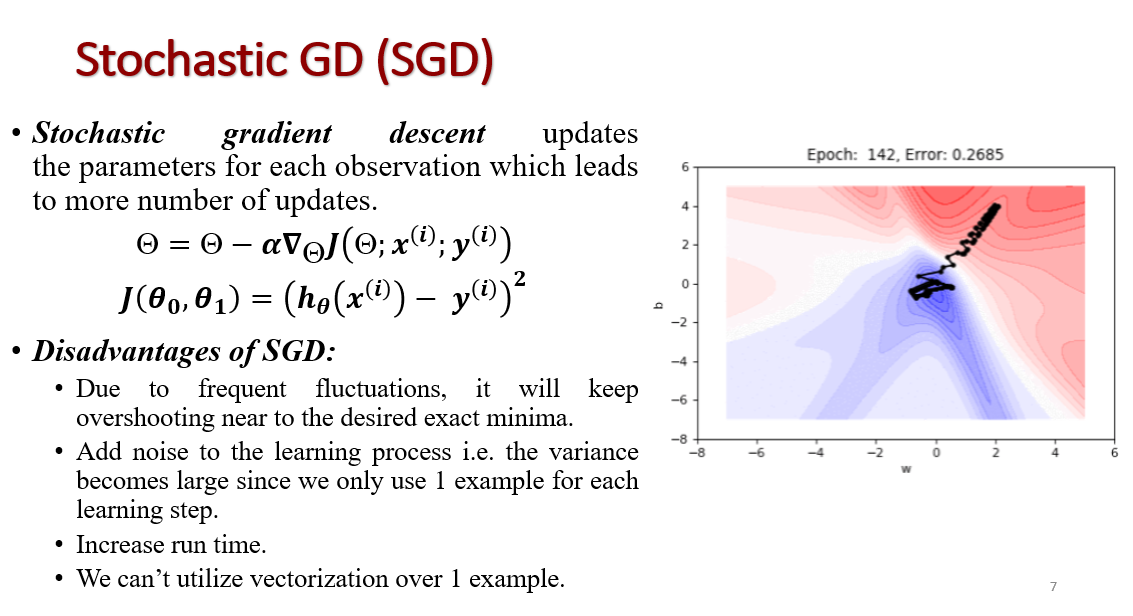

# 3) STOCHASTIC GRADIENT DESCENT

In [ ]:
def Stochastic_GD(x,y,maxEpochs , batchSize , learningRate , convergence):
    loss=[]
    thetaList0=[]
    thetaList1=[]
    ypredictedEpochs=[]
    X=np.column_stack((np.ones(len(x),dtype=int),x)) 
    y=y.reshape(-1,1)     
    m=(X.shape)[0]        
    thetas=np.zeros((X.shape[1],1))
    count=0
    epoch=0
    
    lossBatch=[]
    ypredictedList=[]
    numberOfBatch=int(m/batchSize)  
    
    while epoch < maxEpochs:
        count +=1
        for i in range(0,m,numberOfBatch):
            ypredicted = X[i:i+numberOfBatch] @ thetas 
            ypredictedList.append(ypredicted)
            
            costOld=(np.sum(np.square(ypredicted - y[i:i+numberOfBatch])))/ (2*numberOfBatch) 

            Gradient = (np.transpose(X[i:i+numberOfBatch]) @ (ypredicted - y[i:i+numberOfBatch]) ) / numberOfBatch 
            thetas =thetas - (learningRate * Gradient) 
            thetaList0.append(thetas[0])
            thetaList1.append(thetas[1])


            ypredicted = X[i:i+numberOfBatch] @ thetas 
            ypredictedTotal=X@thetas
            
            costNew=(np.sum(np.square(ypredicted - y[i:i+numberOfBatch])))/ (2*numberOfBatch)
            lossBatch.append(costNew)
            
        
        ypredictedEpochs.append(ypredictedTotal)
        loss.append(costNew)
        
        if abs(costOld - costNew) < convergence:
            print(f'convergence occur after ({count}) iterations')
            yp=np.concatenate(ypredictedList , axis=0)
            yp=np.reshape(yp[-1*m:],(m,1))
            return r2_score(y,yp) ,thetas[-1] ,yp ,loss ,lossBatch,thetaList0 ,thetaList1 ,ypredictedEpochs
        
        epoch+=1
        yp=np.concatenate(ypredictedList , axis=0)
        yp=np.reshape(yp[-1*m:],(m,1))
        
    print(f'sorry Max_epochs ({maxEpochs}) have occured')
    return r2_score(y,yp) ,thetas[-1] ,yp ,loss ,lossBatch,thetaList0 ,thetaList1 ,ypredictedEpochs
        

In [ ]:
Rscore ,mthetas ,yp ,loss ,lossBatch,thetaList0 ,thetaList1 ,ypredictedEpochs=Stochastic_GD(x,y,1000 , len(x) , 0.000001 , 0.000001)

In [ ]:
Rscore *100

In [ ]:
plt.plot(loss,color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss vs epochs")
plt.show()

In [ ]:
plt.plot(thetaList0,lossBatch , color="green")
plt.xlabel("theta0")
plt.ylabel("lossBatch")
plt.title("theta0 vs lossBatch")
plt.show()

In [ ]:
plt.plot(thetaList0,lossBatch , color="green")
plt.xlabel("theta0")
plt.ylabel("lossBatch")
plt.title("theta0 vs lossBatch")
plt.show()

In [ ]:
for h in ypredictedEpochs:
    plt.scatter(x,y,color="green")
    plt.plot(x,h)
    plt.show()

In [ ]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)

In [ ]:
plt.scatter(x,y)
plt.plot(x,yp)
plt.xlabel("x")
plt.ylabel("y")
plt.title("best lineRegression")
plt.show()

# MOMENTUM BASED GRADIENT

# 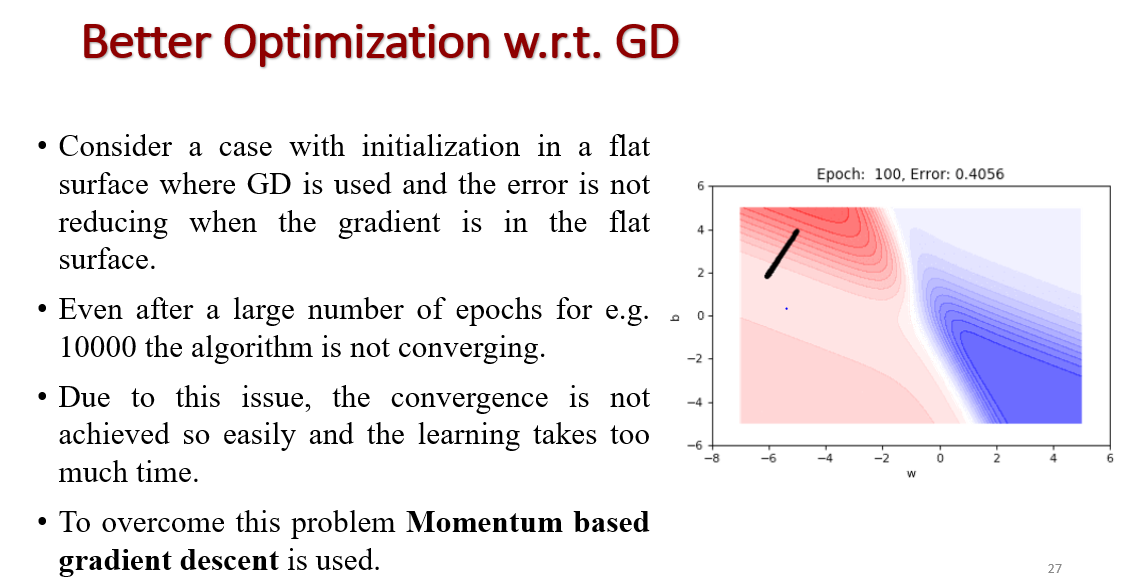

# 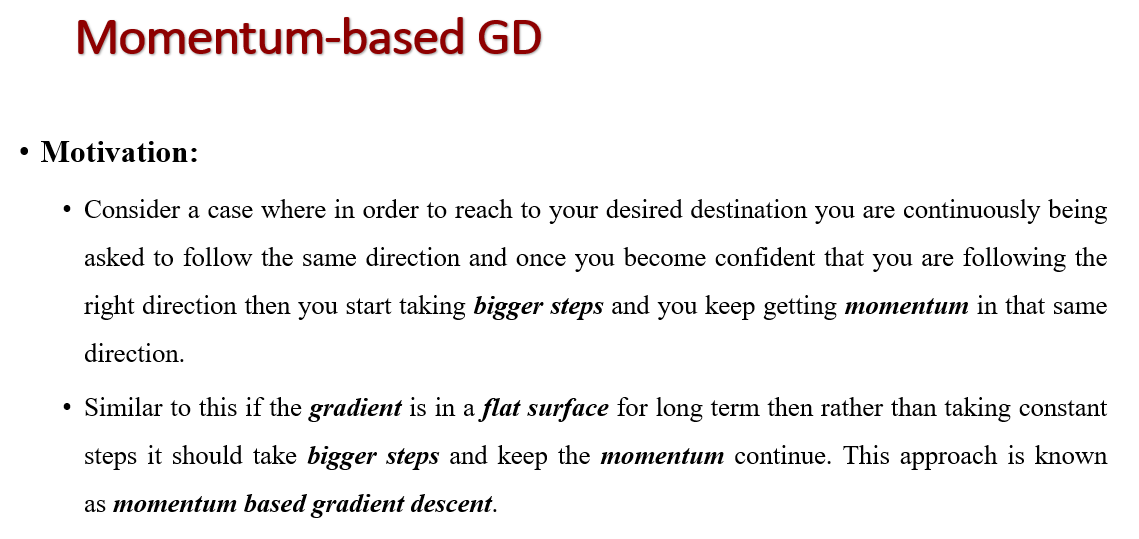

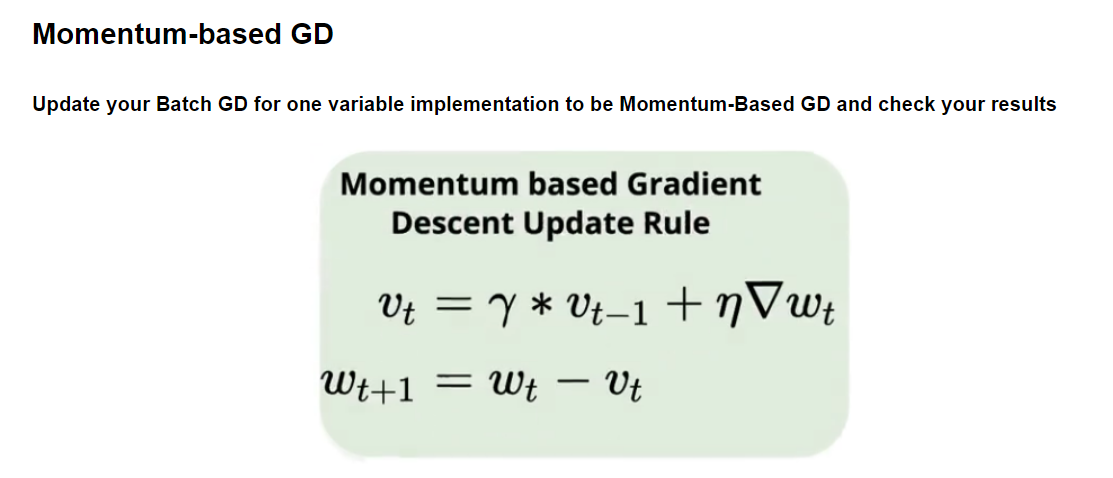

In [ ]:
def MomentumBased_Batch_GD(x,y,maxEpochs,gama ,learningRate ,convergence):
    loss=[]
    thetaList0=[]
    thetaList1=[]
    ypredictedEpochs=[]
    X=np.column_stack((np.ones(len(x),dtype=int),x)) 
    y=y.reshape(-1,1)     
    m=(X.shape)[0]        #m=20
    thetas=np.zeros((X.shape[1],1))
    count=0
    epoch=0
    
    v=0
    while epoch < maxEpochs:
        count +=1
        
        ypredicted = X @ thetas 
        costOld=(np.sum(np.square(ypredicted - y)))/ (2*m) 
        
        Gradient = (np.transpose(X) @ (ypredicted - y) ) / m 
        
        v= ( gama*v ) + (learningRate * Gradient)
        thetas =thetas - v  #where v for speed up the update 
        
        thetaList0.append(thetas[0])
        thetaList1.append(thetas[1])
        
        
        ypredicted = X @ thetas # (20,2) @ (2,1) ===> (20,1)
        costNew=(np.sum(np.square(ypredicted - y)))/ (2*m) #Mean Square Error (New). 
        
        loss.append(costNew) #loss list
        ypredictedEpochs.append(ypredicted)
        
        if abs(costOld - costNew) < convergence:
            print(f'convergence occur after{count} iterations')
            return r2_score(y,ypredicted) ,thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        
        epoch+=1
    
    print(f'sorry Max_epochs {maxEpochs} have occured')
    return r2_score(y,ypredicted),thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        

In [ ]:
R2score,thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs = MomentumBased_Batch_GD(x,y,1000, 0.8, 0.0001,0.0001)

In [ ]:
R2score *100

In [ ]:
plt.plot(loss,color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss vs epochs")
plt.show()

In [ ]:
plt.plot(thetaList0,loss , color="green")
plt.xlabel("theta0")
plt.ylabel("loss")
plt.title("theta0 vs lossBatch")
plt.show()

In [ ]:
plt.plot(thetaList1,loss , color="green")
plt.xlabel("theta0")
plt.ylabel("loss")
plt.title("theta0 vs lossBatch")
plt.show()

In [ ]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)
    plt.show()

In [ ]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)

In [ ]:
plt.scatter(x,y)
plt.plot(x,ypredicted)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Best regression Line")
plt.show()

# 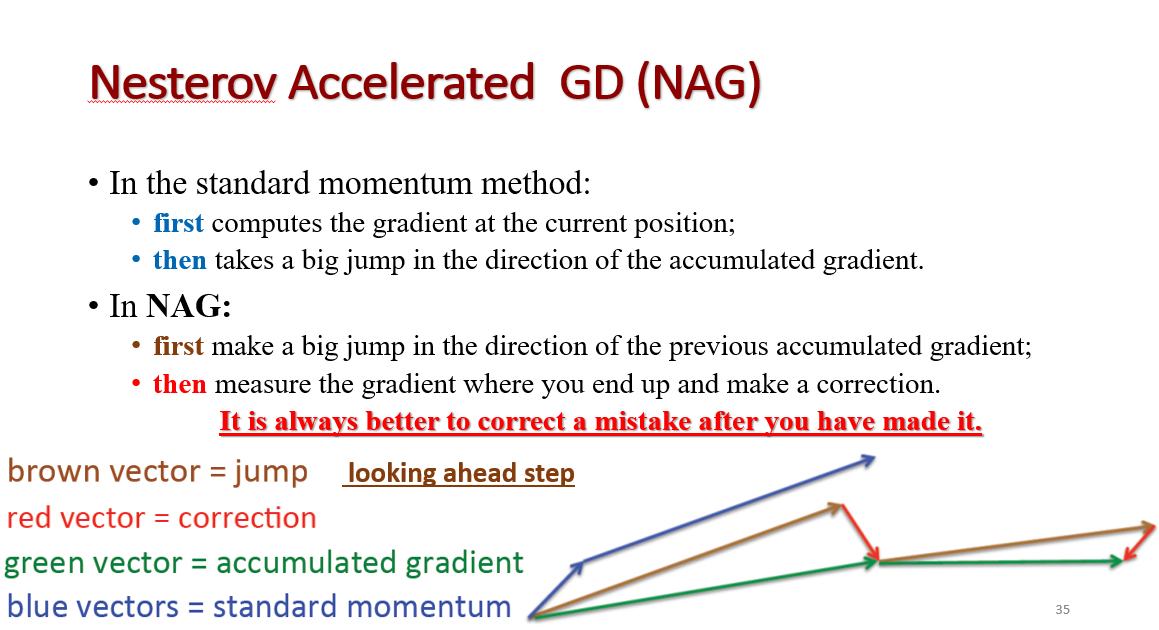

# 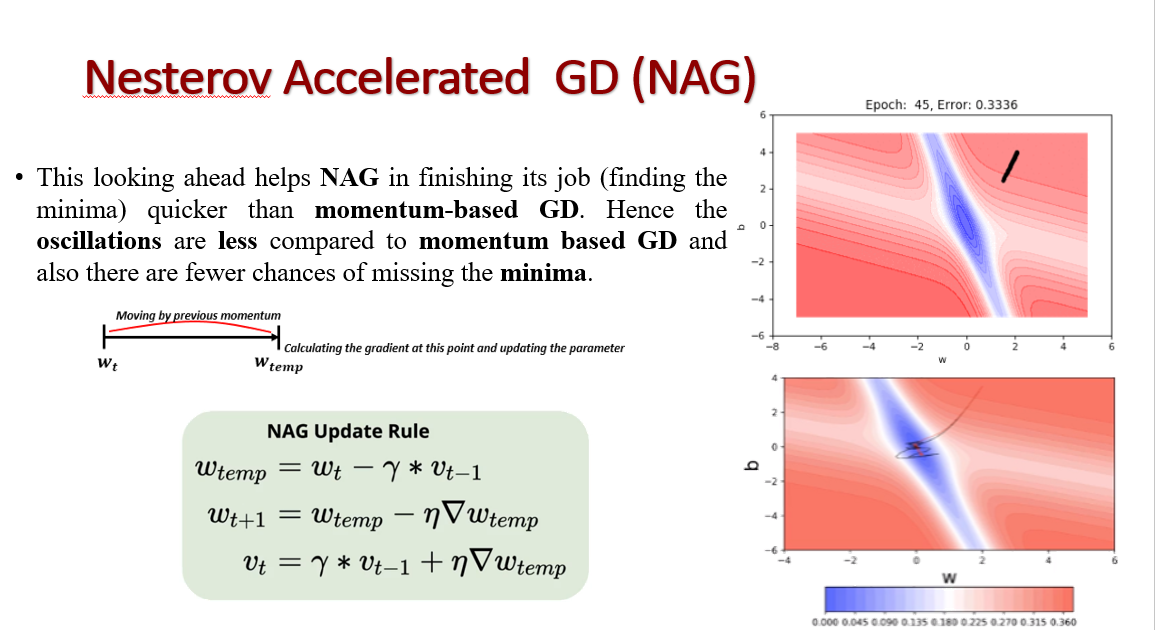

# NESTROV ACCELERATED GD(NAG)

# 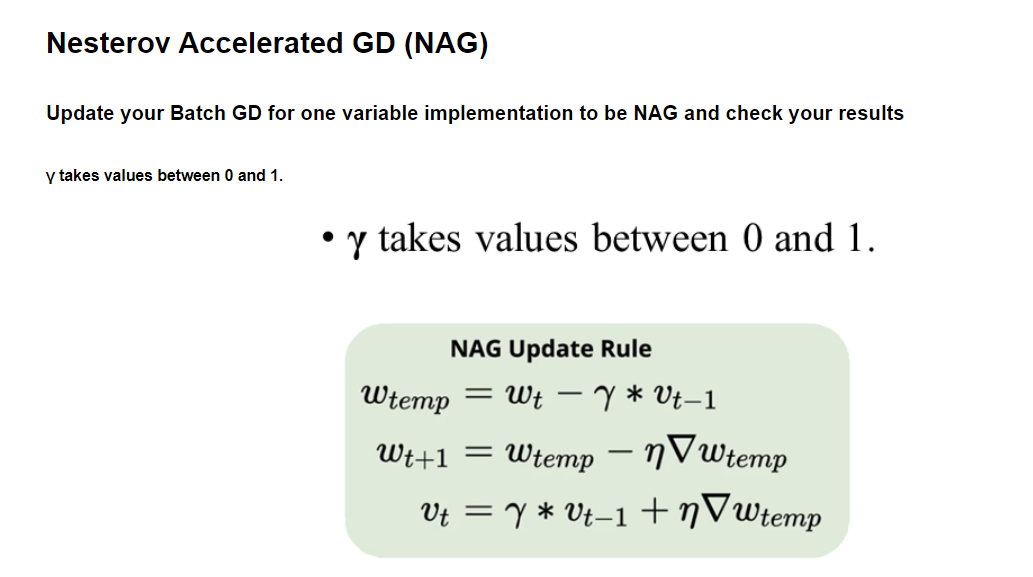

In [ ]:
def NestrovAccelerated_Batch_GD(x,y,maxEpochs,gama ,learningRate ,convergence):
    loss=[]
    thetaList0=[]
    thetaList1=[]
    ypredictedEpochs=[]
    X=np.column_stack((np.ones(len(x),dtype=int),x)) 
    y=y.reshape(-1,1)     
    m=(X.shape)[0]       
    thetas=np.zeros((X.shape[1],1))
    count=0
    epoch=0
    
    v=0
    while epoch < maxEpochs:
        count +=1
        
        ypredicted = X @ thetas 
        costOld=(np.sum(np.square(ypredicted - y)))/ (2*m) 
        
        Gradient = (np.transpose(X) @ (ypredicted - y) ) / m 
        
        theta_temp = thetas - (gama * v)
        ypredicted_temp = X @ theta_temp 
        Gradient_temp = (np.transpose(X) @ (ypredicted_temp - y) ) / m 
        thetas = theta_temp - (learningRate * Gradient_temp)
        v =  (gama * v) + (learningRate * Gradient_temp)
        
        
        thetaList0.append(thetas[0])
        thetaList1.append(thetas[1])
        
        
        ypredicted = X @ thetas 
        costNew=(np.sum(np.square(ypredicted - y)))/ (2*m) 
        
        loss.append(costNew) 
        ypredictedEpochs.append(ypredicted)
        
        if abs(costOld - costNew) < convergence:
            print(f'convergence occur after ({count}) iterations')
            return r2_score(y,ypredicted) ,thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        
        epoch+=1
    
    print(f'sorry Max_epochs ({maxEpochs}) have occured')
    return r2_score(y,ypredicted),thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs
        

In [ ]:
R2Score,thetas ,ypredicted ,loss ,thetaList0 ,thetaList1 ,ypredictedEpochs = NestrovAccelerated_Batch_GD(x,y,1000,0.09 ,0.0001 ,0.0001)

In [ ]:
R2Score

In [ ]:
plt.plot(loss,color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss vs epochs")
plt.show()

In [ ]:
plt.plot(thetaList0,loss , color="green")
plt.xlabel("theta0")
plt.ylabel("loss")
plt.title("theta0 vs lossBatch")
plt.show()

In [ ]:
plt.plot(thetaList1,loss , color="green")
plt.xlabel("theta0")
plt.ylabel("loss")
plt.title("theta0 vs lossBatch")
plt.show()

In [ ]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)
    plt.show()

In [ ]:
for h in ypredictedEpochs:
    plt.scatter(x,y)
    plt.plot(x,h)

In [ ]:
plt.scatter(x,y)
plt.plot(x,ypredicted)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Best regression Line")
plt.show()